# Linear Regression - Python coding simple Linear Regression

În cadrul acestui subcapitol o să scriem cod de Python de Linear Regression simplu, care folosește doar un singur feature. În cadrul acestei lecturi o să și începem să ne gândim cum anume am putea să evaluăm performanța unui model. La finalul acestui subcapitol ar trebui să avem mai multe întrebări despre cum am putea îmbunătăți un algorimt de Linear Regression. Pentru acest exemplu o să ne folosim de librăria numpy în mare parte

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Read the data into a Pandas DataFrame
df = pd.read_csv('../data/08-Linear-Regression-Models/Advertising.csv')

In [10]:
# Printing the first five rows of the DataFrame
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


În DataFrame-ul de mai sus avem date desprea partea de publicitate (TV, radio și newspaper) și numărul de vânzări (sales) pentru o anumită unitate. Ceea ce dorim să aflăm este dacă există ceva corelație între publicitate și numărul de vânzări. Folosind partea de Linear Regreesion simplă, putem utiliza însă un singur feature. Putem să combină toate datele din DataFrame-ul de mai sus într-un singur feature care să reprezinte numărul total de vânzări.

In [11]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [12]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


Urmează partea în care o să ne ocupăm de vizualiare. Să vedem dacă există o relație între totaul cheltuit pe publicitate și numărul de vânzări

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

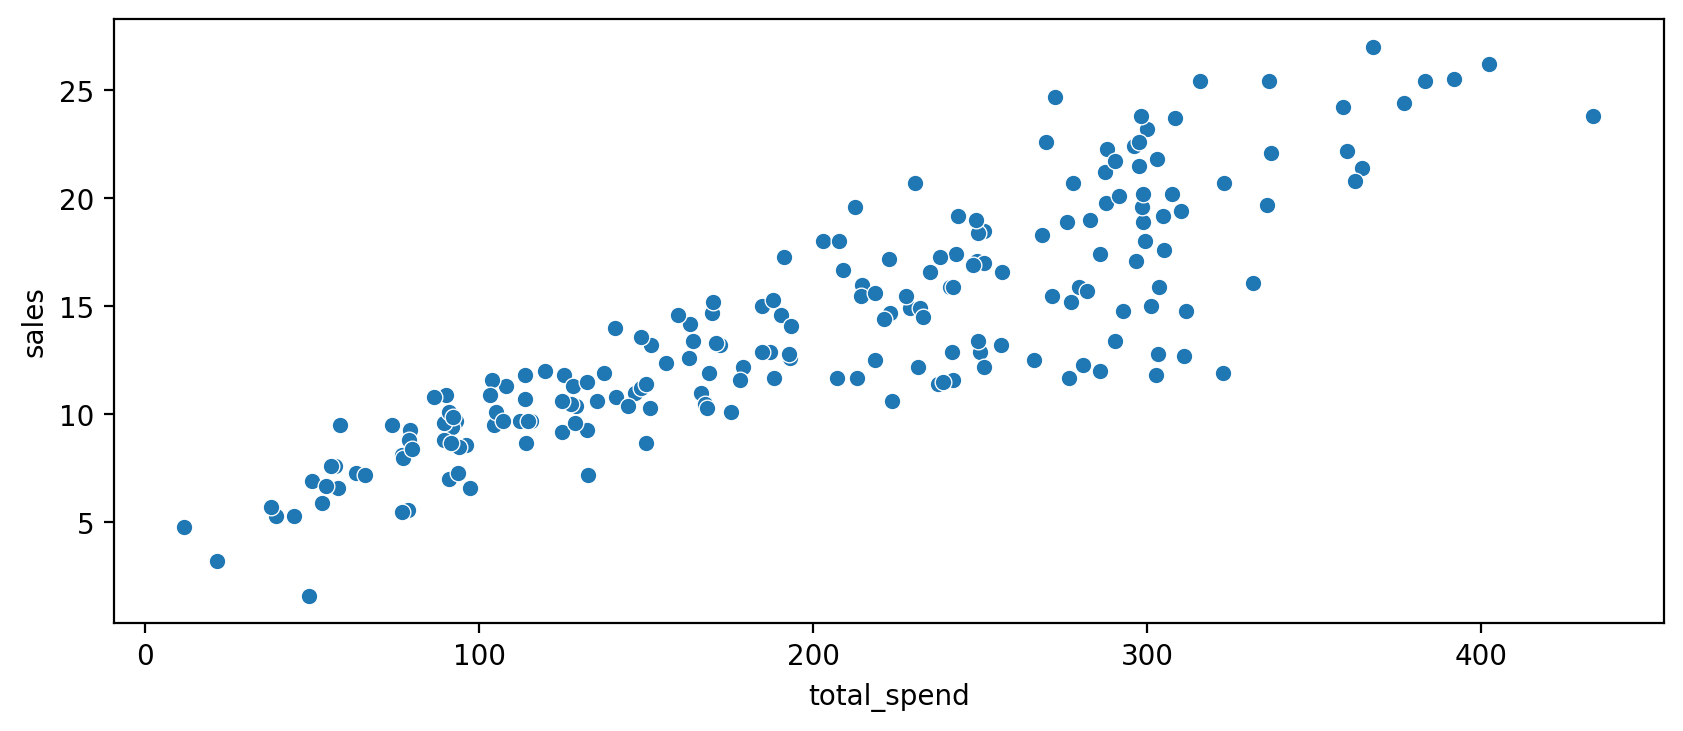

In [13]:
plt.figure(figsize=(10, 4), dpi=200)
sns.scatterplot(data=df, x='total_spend', y='sales')

Din graficul de mai sus pare să existe o corelație între date, și anume, cu cât se cheltuiește mai mult pe parte de publicitte, cu atâta crește numărul de vânzări. Pare să existe o corelație liniară între aceste valori. Ce este frumos la librăria de Seaborn este faptul că atunci când dorim să facem o Regresie Liniară simplă (cu un singur feature) putem să utilizăm un plot care ne arată linia de regresie. Acest plot poartă denumirea de regplot

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

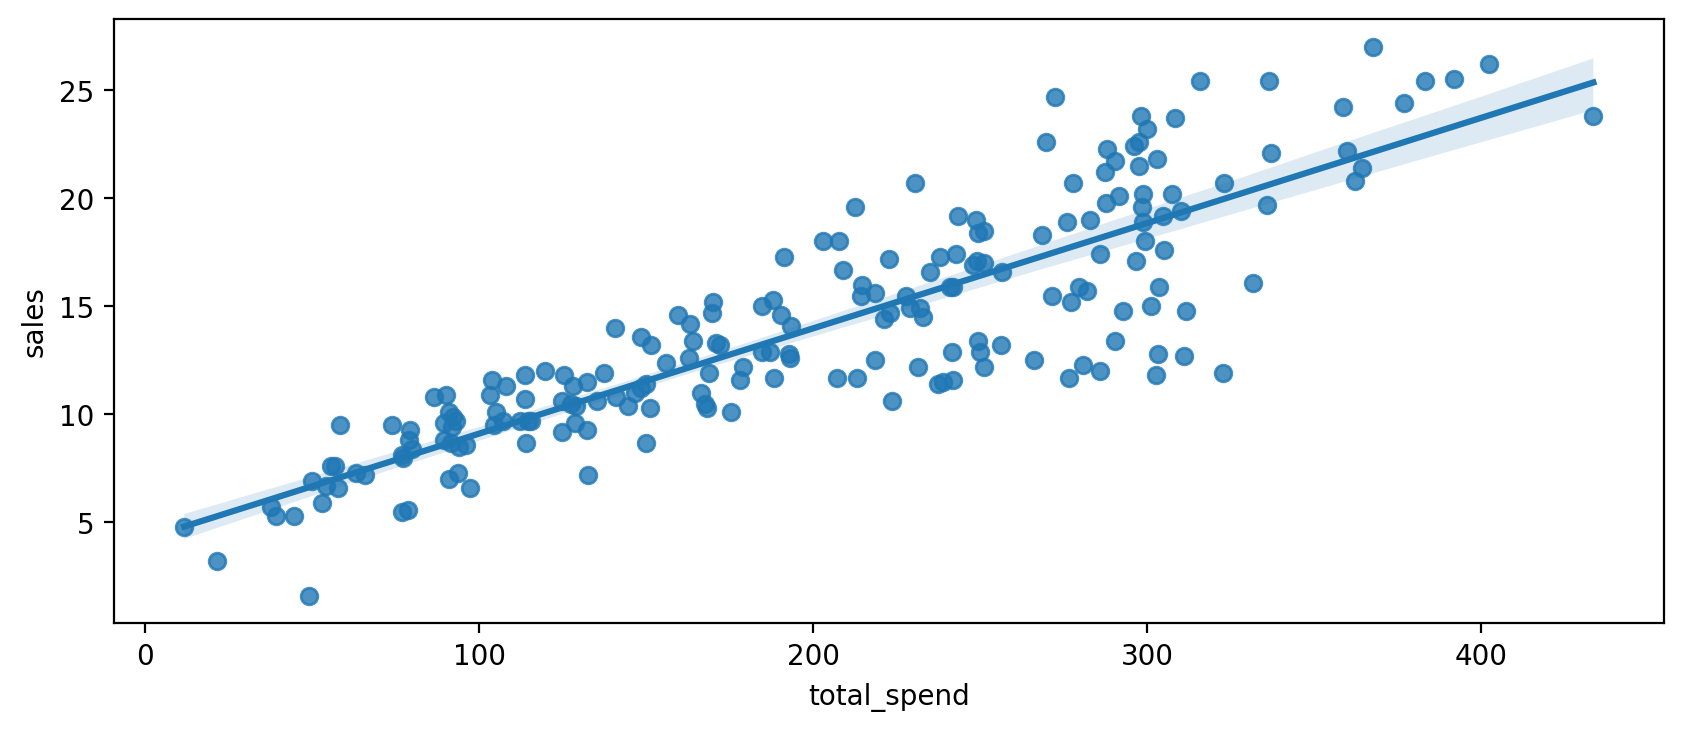

In [14]:
plt.figure(figsize=(10, 4), dpi=200)
sns.regplot(data=df, x='total_spend', y='sales')

Întrebarea care apare este cum anume putem să calculăm acea linie. Având această linie am putea să prezicem numărul de vânzări dacă cunoaștem valoarea pentru total_spend. Putem să separăm datele respective în două variabile diferite, X pentru features și y pentru labels

In [15]:
X = df['total_spend']
y = df['sales']

Pentru a calcula valoarea de care avem nevoie putem să ne utilizăm de metoda polyfit() din numpy. Aceasta are nevoie de două array-uri, cel de features și cel de labels și de o valoare pentru parametrul deg, care reprezintă ridicarea la putere (o să folosim valoarea 1)

In [16]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

Valorile care sunt returnate de către această funcție reprezintă valorile pentru coeficientele B1 și B0. Din moment ce avem aceste valori, putem prezice pentru orice valoare X, valoarea pentru y. Adică pentru orice sumă totală care s-a utilizat pentru partea de publicitate (total_spend) am putea să prezicem numărul total de sales

În continuare o să ne creem un array de valori (cuprinse între 0 și 500) pentru care o să calculăm 'predicțiile' de y.

In [17]:
potential_spend = np.linspace(0, 500, 100)

Mai sus am creat un array de 100 de valori cuprinse între 0 și 500. Pentru aceste valori (aceste valori reprezintă totalul ce s-a cheltuit pe publicitate) putem să calculăm numărul total de vânzări utilizând formula:

y = B1x + B0

Din această formulă avem coeficientele pentru B0 și B1 (cele care au fost returnate din metoda np.polyfit()), iar valoarea lui X rerepzintă fiecare valoare din cadrul acelui array

In [18]:
predictions_sales = (0.04868788 * potential_spend) + 4.24302822

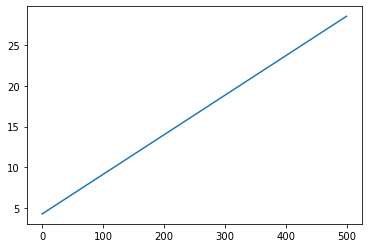

In [19]:
plt.plot(potential_spend, predictions_sales)

Mai sus am creat un grafic în care am creat o linie ce reprezintă corelația dintre potential_spend și predictions_sales. Dacă adăugăm la acest plot și scatterplot-ul pentru datele din DataFrame o să observăm că această linie este identică cu cea din plotul de regplot(), plot care ne afișează o linie de regresie

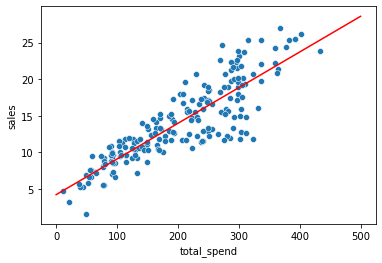

In [22]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spend, predictions_sales, color='red')

Văzând că cele două linii sunt identice, prin acest procedeu putem să aflăm numărul de sales(y) dacă știm valoarea pentru toatl_spend (X). Să realizăm această predicție pentru valoarea 200

In [23]:
spend = 200 
predict_sales = (0.04868788 * spend) + 4.24302822

In [25]:
predict_sales

13.98060422

Din codul de mai sus rezultă faptul că dacă avem o valoare de total_spend de 200, atunci ca și sales trebuie să avem 13.9 . Dacă ne uităm mai bine la acel grafic, putem vedea că pentru valoarea de 200 de la total spend, s-ar potrivi acea valoare prezisă de 13.9

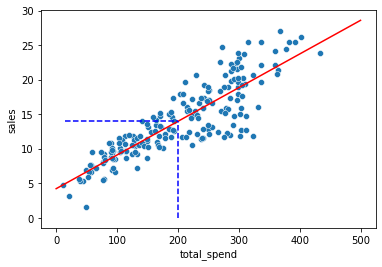

In [39]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spend, predictions_sales, color='red')
plt.plot([200, 200], [0, predict_sales], 'b--')
plt.plot([predict_sales, 200], [predict_sales, predict_sales], 'b--')

Ce anume nu putem ști pentru această predicție pe care am făcut-o este dacă acea valoare care s-a prezis este una corectă sau nu, adică nu știm cum anume să evaluăm predicția respectivă. Am prezis valoare de sales de 13.9 pentru un toatl_spend de 200, dar cum ne putem asigura că este valoarea corectă? Pentru a afla asta trebuie să împărțim setul de date în train-test, iar Scikit-Learn are mai multe metode prin care se poate face asta automat. Prin metoda polyfit() nu putem măsura performanța unui model, nu știm dacă modelu face overfit sau underfit la date (o să vedem ce anunme înseamnă acești termeni)

În continuare o să apelăm din nou metoda polyfit(), dar de data asta o să utilizăm o altă valoare pentru degree. Până în acest moment am avut ecuația:

y = B1X + B0

Din moment ce o să relizăm o ecuație de alt grad, aceasta o să se modifice

In [40]:
np.polyfit(X, y, deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

Mai sus am creat o ecuație de gradul 3, care a returnat 4 valori în loc de două. În acest moment, ecuația cu care am lucrat s-a modificat și o să arate în felul următor:

y = B3X ** 3 + B2X ** 2 + B1X + B0

In [41]:
potential_spend_poly = np.linspace(0, 500, 100)

In [42]:
predict_sales_poly = 3.07615033e-07 * potential_spend_poly ** 3 + -1.89392449e-04 * potential_spend_poly ** 2 + 8.20886302e-02 * potential_spend_poly + 2.70495053e+00

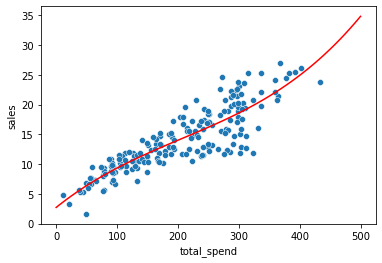

In [43]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spend_poly, predict_sales_poly, color='red')

Din moment ce am schimbat exuația, se pare că s-a modificat și linia de regresie, acuma aceasta este un pic mai curbată. Întrebarea este care anume dintre aceste două ecuații (modele) face predicții mai bune? Și cum anume putem verifica calitatea unui model? Toate acestea o să le aflăm pe parcursul acestei secțiuni

In [44]:
spend_poly = 200
predict_spend_poly = 3.07615033e-07 * spend_poly ** 3 + -1.89392449e-04 * spend_poly ** 2 + 8.20886302e-02 * spend_poly + 2.70495053e+00

In [45]:
predict_spend_poly

14.007898873999997

După cum se poate observa, și valoarea care s-a prezis a fost modificată. Care dintre aceste două modele este cel mai bun? Vizual nu putem să ne dăm seama de asta, trebuie să începem să realizăm anumite calcule de erori pentru a vedea diferența dintre cele două modele. Compararea modelelor este ceva o să se discute destul de mult în ceea ce privește partea de Machine Learning

Până în acest moment am realizat ecuații doar cu un singur Feature, și anume total_spend. Poate dorim să aflăm care este corelația dintre TV și sales, poate faptul că se investește mai mult în publicitate în partea de TV decât în ziare are un impact mai mare în ceea ce privește numărul de sales.

O să se discute toate acestea în următoarele lecții în care o să folosim Scikit-Learn